In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt
 
import os
os.getcwd()
df=pd.read_csv("heart1.csv")
df.shape


(1025, 14)

In [3]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    1
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.isnull().count()

age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
df==0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,True,False,False,True,False,False,True,False,False,False,False,True
1,False,False,True,False,False,True,False,False,True,False,False,False,False,True
2,False,False,True,False,False,True,False,False,False,False,True,True,False,True
3,False,False,True,False,False,True,False,False,True,True,False,False,False,True
4,False,True,True,False,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,True,False,False,False,True,False,True,False,False
1021,False,False,True,False,False,True,True,False,False,False,False,False,False,True
1022,False,False,True,False,False,True,True,False,False,False,False,False,False,True
1023,False,True,True,False,False,True,True,False,True,True,False,True,False,False


In [9]:
df[df==0].count

<bound method DataFrame.count of       age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     NaN  NaN  0.0       NaN   NaN  0.0      NaN      NaN    0.0      NaN   
1     NaN  NaN  0.0       NaN   NaN  0.0      NaN      NaN    0.0      NaN   
2     NaN  NaN  0.0       NaN   NaN  0.0      NaN      NaN    NaN      NaN   
3     NaN  NaN  0.0       NaN   NaN  0.0      NaN      NaN    0.0      0.0   
4     NaN  0.0  0.0       NaN   NaN  NaN      NaN      NaN    0.0      NaN   
...   ...  ...  ...       ...   ...  ...      ...      ...    ...      ...   
1020  NaN  NaN  NaN       NaN   NaN  0.0      NaN      NaN    NaN      0.0   
1021  NaN  NaN  0.0       NaN   NaN  0.0      0.0      NaN    NaN      NaN   
1022  NaN  NaN  0.0       NaN   NaN  0.0      0.0      NaN    NaN      NaN   
1023  NaN  0.0  0.0       NaN   NaN  0.0      0.0      NaN    0.0      0.0   
1024  NaN  NaN  0.0       NaN   NaN  0.0      NaN      NaN    0.0      NaN   

      slope   ca  thal  target

In [10]:
df.mean()

age          54.433171
sex           0.695610
cp            0.942439
trestbps    131.614258
chol        245.886829
fbs           0.148293
restecg       0.530732
thalach     149.126829
exang         0.335610
oldpeak       1.069463
slope         1.387317
ca            0.756098
thal          2.323902
target        0.513171
dtype: float64

In [11]:
df['age'].mean()

54.433170731707314

In [12]:
df=df.fillna(df.mean())

In [13]:
df=df.astype({'trestbps':'int','oldpeak':'int'})

In [14]:
print(df.to_string())

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0      52    1   0       125   212    0        1      168      0        1      2   2     3       0
1      52    1   0       125    87    0        1      168      0        1      2   2     3       0
2      70    1   0       145   174    0        1      125      1        2      0   0     3       0
3      61    1   0       148   203    0        1      161      0        0      2   1     3       0
4      62    0   0       138   294    1        1      106      0        1      1   3     2       0
5      58    0   0       100   248    0        0      122      0        1      1   0     2       1
6      58    1   0       131   318    0        2      140      0        4      0   3     1       0
7      55    1   0       160   289    0        0      145      1        0      1   1     3       0
8      46    1   0       120   249    0        0      144      0        0      2   0     3       0
9      54 

In [15]:
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1,2,2,3,0
1,52,1,0,125,87,0,1,168,0,1,2,2,3,0
2,70,1,0,145,174,0,1,125,1,2,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1,1,3,2,0


In [17]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1,1,1,3,0


In [18]:
print(df.iloc[10:20])

    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
10   71    0   0       112   149    0        1      125      0        1   
11   43    0   0       132   341    1        0      136      1        3   
12   34    0   1       118   210    0        1      192      0        0   
13   51    1   0       140   298    0        1      122      1        4   
14   52    1   0       128   204    1        1      156      1        1   
15   34    0   1       118   210    0        1      192      0        0   
16   51    0   2       140   308    0        0      142      0        1   
17   54    1   0       124   266    0        0      109      1        2   
18   50    0   1       120   244    0        1      162      0        1   
19   58    1   2       140   211    1        0      165      0        0   

    slope  ca  thal  target  
10      1   0     2       1  
11      1   0     3       0  
12      2   0     2       1  
13      1   3     3       0  
14      1   0     0     

In [19]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1,2,2,3,0
1,52,1,0,125,87,0,1,168,0,1,2,2,3,0
2,70,1,0,145,174,0,1,125,1,2,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0,2,0,2,1


In [20]:
x=df['sex']
y=df['target']

In [21]:
x

0       1
1       1
2       1
3       1
4       0
       ..
1020    1
1021    1
1022    1
1023    0
1024    1
Name: sex, Length: 1025, dtype: int64

In [22]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

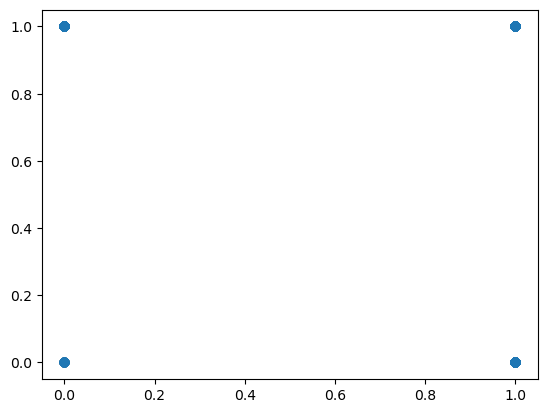

In [23]:
plt.scatter(x,y)
plt.show()

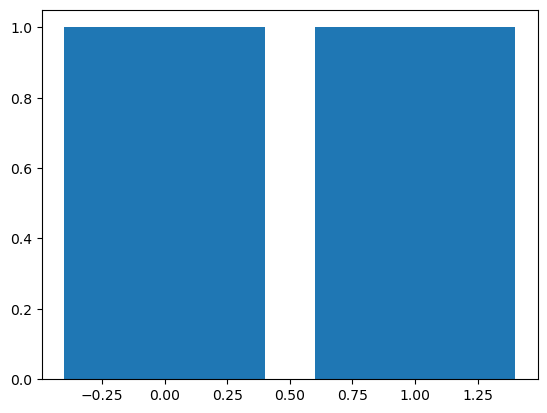

In [24]:
plt.bar(x,y)
plt.show()

In [25]:
x1=df['age']
y1=df['chol']

In [26]:
x1

0       52
1       52
2       70
3       61
4       62
        ..
1020    59
1021    60
1022    47
1023    50
1024    54
Name: age, Length: 1025, dtype: int64

In [27]:
y1

0       212
1        87
2       174
3       203
4       294
       ... 
1020    221
1021    258
1022    275
1023    254
1024    188
Name: chol, Length: 1025, dtype: int64

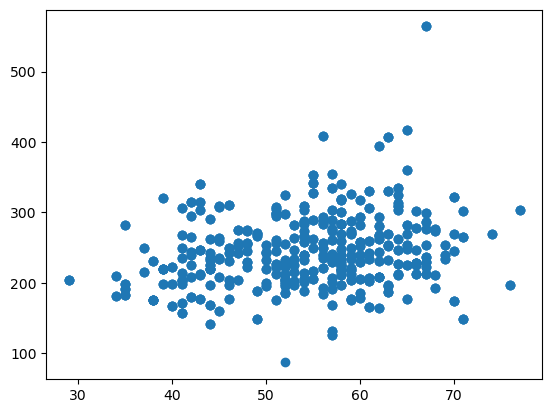

In [28]:
plt.scatter(x1,y1)
plt.show()

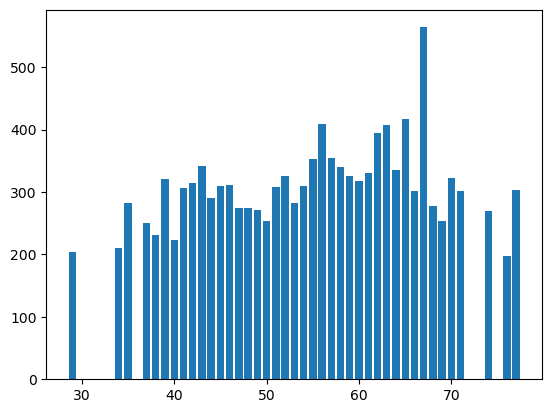

In [29]:
plt.bar(x1,y1)
plt.show()

In [31]:
# Feature Selection

In [32]:
x=df.drop('target',axis='columns')
y=df['target']

In [33]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1,2,2,3
1,52,1,0,125,87,0,1,168,0,1,2,2,3
2,70,1,0,145,174,0,1,125,1,2,0,0,3
3,61,1,0,148,203,0,1,161,0,0,2,1,3
4,62,0,0,138,294,1,1,106,0,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2,1,1,3
1022,47,1,0,110,275,0,0,118,1,1,1,1,2
1023,50,0,0,110,254,0,0,159,0,0,2,0,2


In [34]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [38]:
x_train.shape

(820, 13)

In [39]:
y_train.shape

(820,)

In [40]:
x_test.shape

(205, 13)

In [42]:
y_test.shape

(205,)

In [43]:
Reg=LogisticRegression()
Reg.fit(x_train,y_train)

/home/vboxuser/Downloads/yes/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
ypred=Reg.predict(x_test)

In [45]:
ypred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1])

In [46]:
score=accuracy_score(y_test,ypred)
print(score)

0.8585365853658536


In [48]:
report=classification_report(y_test,ypred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       100
           1       0.83      0.90      0.87       105

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



[[81 19]
 [10 95]]


<Axes: >

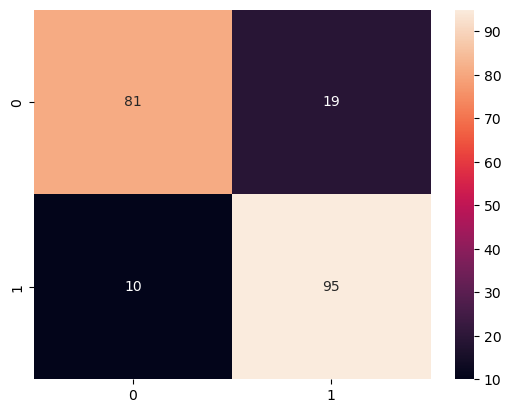

In [49]:
mat=confusion_matrix(y_test,ypred)
print(mat)
sns.heatmap(confusion_matrix(y_test,ypred),annot=True)